In [3]:
import pandas as pd
import numpy as np

In [77]:
ga = pd.read_excel('Google Analytics -  Dataset.xlsx',usecols=[0,1,2,3,4,5,6,7,8,9,10,11,14])
ga.head(5)

,Country,Date,Impressions,Clicks,CTR,Average Position,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,RANK
0,United Arab Emirates,2021-01-05,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,19
1,United Arab Emirates,2021-01-06,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,19
2,United Arab Emirates,2021-01-10,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,19
3,United Arab Emirates,2021-01-14,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,19
4,United Arab Emirates,2021-01-24,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,19


In [78]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Country                    5000 non-null   object        
 1   Date                       5000 non-null   datetime64[ns]
 2   Impressions                5000 non-null   int64         
 3   Clicks                     5000 non-null   int64         
 4   CTR                        5000 non-null   float64       
 5   Average Position           5000 non-null   float64       
 6   Sessions                   5000 non-null   int64         
 7   Bounce Rate                5000 non-null   float64       
 8   Pages / Session            5000 non-null   float64       
 9   Transactions               5000 non-null   int64         
 10  Revenue                    5000 non-null   float64       
 11  Ecommerce Conversion Rate  5000 non-null   float64       
 12  RANK  

In [79]:
ga.isnull().sum()

Country                      0
Date                         0
Impressions                  0
Clicks                       0
CTR                          0
Average Position             0
Sessions                     0
Bounce Rate                  0
Pages / Session              0
Transactions                 0
Revenue                      0
Ecommerce Conversion Rate    0
RANK                         0
dtype: int64

In [80]:
ga.describe()

,Date,Impressions,Clicks,CTR,Average Position,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,RANK
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2022-04-23 07:57:12.960000,2.556200,0.086600,2.266849,21.227736,140.542000,0.014049,6.053111,2.298400,472.185374,0.001725,20.686600
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2022-02-04 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000
50%,2022-04-17 00:00:00,1.000000,0.000000,0.000000,7.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,16.000000
75%,2022-08-15 06:00:00,2.000000,0.000000,0.000000,36.000000,9.000000,0.000000,8.857143,0.000000,0.000000,0.000000,32.000000
max,2023-05-16 00:00:00,90.000000,5.000000,100.000000,170.000000,4867.000000,1.000000,96.000000,179.000000,40901.860000,1.000000,53.000000
std,NaN,6.188772,0.361008,12.177758,27.348165,433.208061,0.092514,6.834485,10.028533,2132.993305,0.016381,16.615005


In [81]:
ga.duplicated().sum()

0

In [82]:
# Filter data by region
Country_df = ga[(ga.Country=="United States") | (ga.Country=="Canada") | (ga.Country=="France") | (ga.Country=="Taiwan") | (ga.Country=="Indonesia") | (ga.Country=="United Kingdom") | (ga.Country=="Philippines") | (ga.Country=="United Arab Emirates")]

X = Country_df.drop(['Revenue', 'Country'], axis=1)
y = Country_df['Revenue']


In [83]:
Country_df.shape

(1687, 13)

In [84]:
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [95]:
## Features
X = ga.drop(["Country","Revenue","Date"],axis=1)
## Target
y = ga["Revenue"]

In [96]:
print(X.head())

   Impressions  Clicks  CTR  Average Position  Sessions  Bounce Rate  \
0            0       0  0.0               1.0         1          0.0   
1            0       0  0.0               1.0         1          0.0   
2            0       0  0.0               1.0         1          0.0   
3            0       0  0.0               1.0         1          0.0   
4            0       0  0.0               1.0         1          0.0   

   Pages / Session  Transactions  Ecommerce Conversion Rate  RANK  
0              2.0             0                        0.0    19  
1              2.0             0                        0.0    19  
2              2.0             0                        0.0    19  
3              2.0             0                        0.0    19  
4              2.0             0                        0.0    19  


In [97]:
print(y.head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Revenue, dtype: float64


In [98]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 20)

In [99]:
## dimension of train data
print(X_train.shape)
print(y_train.shape)

(4000, 10)
(4000,)


In [100]:
## dimension of test data
print(X_test.shape)
print(y_test.shape)

(1000, 10)
(1000,)


In [101]:
print(X_train.head())
print(y_train.head())

      Impressions  Clicks  CTR  Average Position  Sessions  Bounce Rate  \
3702            1       0  0.0              65.0         6     0.000000   
4393            2       0  0.0               6.5       199     0.020101   
226             0       0  0.0               1.0         1     0.000000   
913             1       0  0.0              50.0         1     0.000000   
542             0       0  0.0               1.0         1     0.000000   

      Pages / Session  Transactions  Ecommerce Conversion Rate  RANK  
3702        11.666667             0                        0.0     5  
4393        10.552764             0                        0.0     3  
226          2.000000             0                        0.0    49  
913          6.000000             0                        0.0    25  
542         44.000000             0                        0.0    16  
3702    0.0
4393    0.0
226     0.0
913     0.0
542     0.0
Name: Revenue, dtype: float64


In [102]:
from sklearn.preprocessing import StandardScaler
## Create StandardScaler instance
scaler = StandardScaler()
# Scale the train data
X_train = scaler.fit_transform(X_train)
# Scale the test data
X_test = scaler.transform(X_test)

In [103]:
## Create KNeighborsRegressor instance
# default n_neighbors = 5
model_knn_reg = KNeighborsRegressor()

In [104]:
model_knn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [105]:
## predict target from test model
y_pred = model_knn_reg.predict(X_test)
# get the predicted for test data
print(y_pred)

[    0.        0.        0.        0.        0.     4830.484     0.
     0.        0.        0.        0.        0.        0.        0.
     0.     4409.566     0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.     8327.766     0.        0.        0.    11028.254
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.     4294.834     0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.     3551.33      0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.     5782.718     

In [106]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(2)

In [107]:
print("Train Error (RMSE) = {:,}".format(rmse))

Train Error (RMSE) = 453.18


In [108]:
r2_score(y_test, y_pred)

0.9451232418966362

In [109]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state = 20)

In [110]:
from sklearn.preprocessing import StandardScaler
## Create StandardScaler instance
scaler = StandardScaler()
# Scale the train dat
X_train = scaler.fit_transform(X_train)
# Scale the test data
X_test = scaler.transform(X_test)

In [111]:
X_train

array([[-0.25375468, -0.24039379, -0.1886838 , ..., -0.22795632,
        -0.17938203, -0.94061168],
       [-0.09127369, -0.24039379, -0.1886838 , ..., -0.22795632,
        -0.17938203, -1.06114111],
       [-0.41623566, -0.24039379, -0.1886838 , ..., -0.22795632,
        -0.17938203,  1.7110358 ],
       ...,
       [-0.25375468, -0.24039379, -0.1886838 , ..., -0.22795632,
        -0.17938203,  0.32494734],
       [-0.09127369, -0.24039379, -0.1886838 , ..., -0.22795632,
        -0.17938203, -1.06114111],
       [-0.41623566, -0.24039379, -0.1886838 , ..., -0.22795632,
        -0.17938203,  1.7110358 ]])

In [112]:
# initialized best Root Mean Square Error
best_rmse = 0
## Initialize best k
best_k = 0
# Select which k neighbors to study
possible_k = [1,2,3,4,5,6,7,8,9]

In [113]:
# Start loop for grid search
for k in possible_k:
    # Create KNN regressor instance
    knn_reg = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    ## fit the KNN Regression model on train data
    knn_reg.fit(X_train, y_train)
    # Train KNN model and predict values for X_test
    y_pred = knn_reg.predict(X_test)
    # Calculate rmse between actual y values and predicted values
    mse = mean_squared_error(y_pred,y_test)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_test, y_pred)    
    # Print k and rmse of each grid point
    print('k: %i, rmse: %.2f, r2: %.2f' %(k, rmse, r2_square))
    # If this value is better than previous one (or it is first step), update best value
    if rmse < best_rmse or k == possible_k[0]:
        best_rmse = rmse
        best_k = k
# Print final best k value and rmse
print("Optimum: kNN, k=%i, rmse: %.2f" %(best_k,best_rmse))

k: 1, rmse: 441.88, r2: 0.95
k: 2, rmse: 390.63, r2: 0.96
k: 3, rmse: 357.42, r2: 0.97
k: 4, rmse: 403.47, r2: 0.96
k: 5, rmse: 453.18, r2: 0.95
k: 6, rmse: 498.78, r2: 0.93
k: 7, rmse: 495.35, r2: 0.93
k: 8, rmse: 505.09, r2: 0.93
k: 9, rmse: 528.68, r2: 0.93
Optimum: kNN, k=3, rmse: 357.42


In [39]:
!python -m pip install prophet


In [234]:
from prophet import Prophet
import pandas as pd 
from prophet.plot import plot_plotly,plot_components_plotly


In [181]:
df = pd.read_excel('Google Analytics -  Dataset.xlsx'
df.head(5)

,Country,Date,Impressions,Clicks,CTR,Average Position,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,Source Name,Ext_Date,RANK
0,United Arab Emirates,2021-01-05,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,Acquisition-SearchConsole-Countries_Analytics ...,2021-01-05,19
1,United Arab Emirates,2021-01-06,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,Acquisition-SearchConsole-Countries_Analytics ...,2021-01-06,19
2,United Arab Emirates,2021-01-10,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,Acquisition-SearchConsole-Countries_Analytics ...,2021-01-10,19
3,United Arab Emirates,2021-01-14,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,Acquisition-SearchConsole-Countries_Analytics ...,2021-01-14,19
4,United Arab Emirates,2021-01-24,0,0,0.0,1.0,1,0.0,2.0,0,0.0,0.0,Acquisition-SearchConsole-Countries_Analytics ...,2021-01-24,19


In [191]:
countries = ["United States", "Canada", "France", "Taiwan", "Indonesia", "United Kingdom", "Philippines", "United Arab Emirates"]
filtered_df = df[df['Country'].isin(countries)]


In [192]:
filtered_df = filtered_df.rename(columns={'Date': 'ds', 'Revenue': 'y'})


In [221]:
m = Prophet(seasonality_prior_scale=0.05, changepoint_prior_scale=0.05)  # Adjust the values as needed
m.fit(filtered_df)

12:20:17 - cmdstanpy - INFO - Chain [1] start processing
12:20:17 - cmdstanpy - INFO - Chain [1] done processing


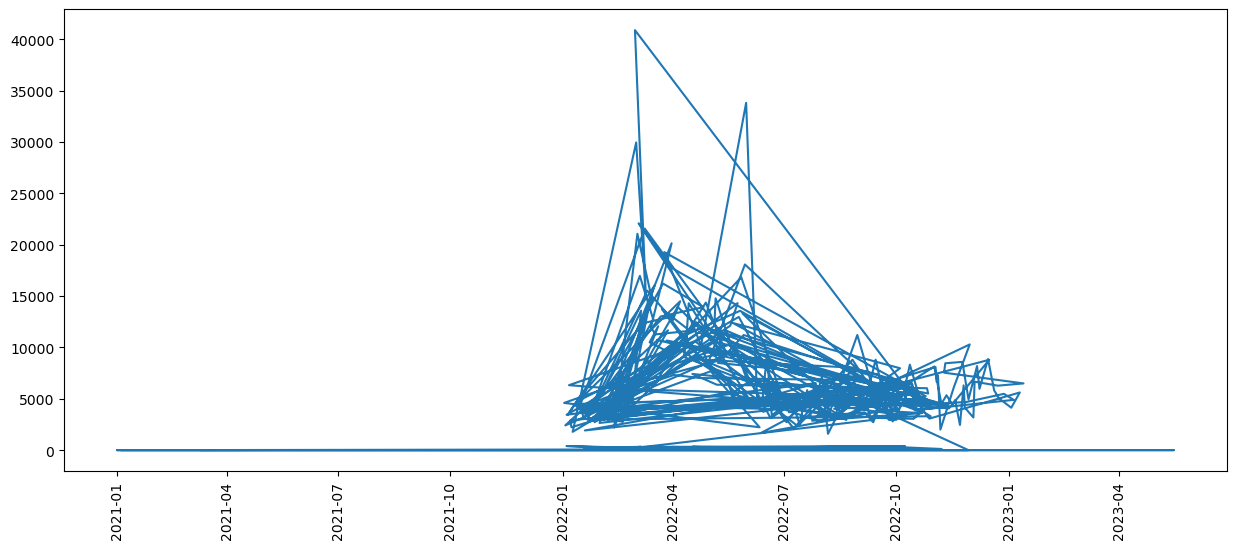

In [222]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(Country_df1['Date'],Country_df1['Revenue'])
plt.xticks(rotation='vertical')
plt.show()

In [223]:
latest_date = filtered_df['ds'].max()

In [224]:
end_date = latest_date + pd.DateOffset(years=3)

In [225]:
future = m.make_future_dataframe(periods=(end_date - latest_date).days)


In [226]:
forecast = m.predict(future)
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1762,2025-12-11,-3404.323907,-6348.911776,331.771465,-5364.204177,-1432.378043,429.065873,429.065873,429.065873,72.702946,72.702946,72.702946,356.362927,356.362927,356.362927,0.0,0.0,0.0,-2975.258034
1763,2025-12-12,-3407.827333,-6286.543089,172.144619,-5370.591742,-1432.887668,441.192972,441.192972,441.192972,87.235993,87.235993,87.235993,353.956979,353.956979,353.956979,0.0,0.0,0.0,-2966.634361
1764,2025-12-13,-3411.330759,-6348.364687,219.591050,-5376.943470,-1433.397293,284.479141,284.479141,284.479141,-66.655875,-66.655875,-66.655875,351.135016,351.135016,351.135016,0.0,0.0,0.0,-3126.851618
1765,2025-12-14,-3414.834185,-6429.734122,197.181276,-5383.295198,-1433.933965,274.276068,274.276068,274.276068,-73.473694,-73.473694,-73.473694,347.749762,347.749762,347.749762,0.0,0.0,0.0,-3140.558116
1766,2025-12-15,-3418.337611,-6509.497018,305.536163,-5389.787683,-1434.532226,222.875726,222.875726,222.875726,-120.780256,-120.780256,-120.780256,343.655982,343.655982,343.655982,0.0,0.0,0.0,-3195.461884


In [228]:
plot_plotly(m,forecast)

In [246]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [247]:
df = pd.read_excel('Google Analytics -  Dataset.xlsx')


In [248]:
countries = ["United States", "Canada", "France", "Taiwan", "Indonesia", "United Kingdom", "Philippines", "United Arab Emirates"]
filtered_df = df[df['Country'].isin(countries)]

In [249]:
grouped_df = filtered_df.groupby('Date')['Revenue'].sum().reset_index()
grouped_df


,Date,Revenue
0,2021-01-01,0.0
1,2021-01-04,0.0
2,2021-01-05,0.0
3,2021-01-06,0.0
4,2021-01-08,0.0
...,...,...
665,2023-05-11,0.0
666,2023-05-13,0.0
667,2023-05-14,0.0
668,2023-05-15,0.0


In [250]:
# Extracting features and target variable
X = grouped_df['Date'].dt.dayofyear.values.reshape(-1, 1)  # Using day of year as feature
y = grouped_df['Revenue'].values


In [251]:
# Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [252]:
# Generate future dates for prediction (next 3 years) with monthly frequency
last_date = grouped_df['Date'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), end=last_date + pd.DateOffset(years=3), freq='M')
future_dayofyear = future_dates.dayofyear.values.reshape(-1, 1)


In [253]:
# Predicting revenue for future dates
future_revenue = model.predict(future_dayofyear)


In [254]:
# Creating a DataFrame for predicted revenue
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Revenue': future_revenue})

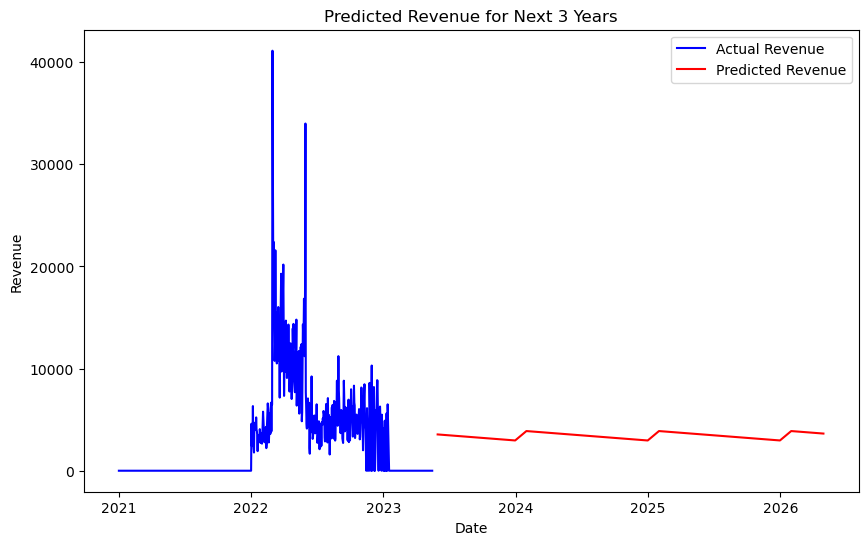

In [255]:
# Plotting the predicted revenue
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Date'], grouped_df['Revenue'], label='Actual Revenue', color='blue')
plt.plot(future_df['Date'], future_df['Predicted_Revenue'], label='Predicted Revenue', color='red')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Predicted Revenue for Next 3 Years')
plt.legend()
plt.show()